## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [21]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [22]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [23]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x/255.*2-1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [24]:
# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [26]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer%d'%(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer%d'%(i+1))(x)
            
    output_layer = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model
    
model = build_mlp(input_shape=x_train.shape[1:])    
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528 

In [27]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [28]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

In [29]:
model.fit(x_train, y_train,
         epochs=EPOCHS,
         batch_size=BATCH_SIZE,
         validation_data=(x_test, y_test),
         shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 47s 945us/step - loss: 1.7911 - accuracy: 0.3666 - val_loss: 1.6021 - val_accuracy: 0.4344
Epoch 2/100
50000/50000 [==============================] - 44s 879us/step - loss: 1.5377 - accuracy: 0.4611 - val_loss: 1.4845 - val_accuracy: 0.4793
Epoch 3/100
50000/50000 [==============================] - 41s 815us/step - loss: 1.4024 - accuracy: 0.5093 - val_loss: 1.4429 - val_accuracy: 0.4928
Epoch 4/100
50000/50000 [==============================] - 42s 836us/step - loss: 1.3103 - accuracy: 0.5407 - val_loss: 1.4125 - val_accuracy: 0.5137
Epoch 5/100
50000/50000 [==============================] - 41s 821us/step - loss: 1.2182 - accuracy: 0.5723 - val_loss: 1.3833 - val_accuracy: 0.5178
Epoch 6/100
50000/50000 [==============================] - 41s 819us/step - loss: 1.1388 - accuracy: 0.6005 - val_loss: 1.3996 - val_accuracy: 0.5141
Ep

50000/50000 [==============================] - 40s 799us/step - loss: 0.1056 - accuracy: 0.9649 - val_loss: 3.4662 - val_accuracy: 0.5371
Epoch 54/100
50000/50000 [==============================] - 40s 796us/step - loss: 0.0968 - accuracy: 0.9681 - val_loss: 3.5331 - val_accuracy: 0.5237
Epoch 55/100
50000/50000 [==============================] - 40s 802us/step - loss: 0.1203 - accuracy: 0.9596 - val_loss: 3.4931 - val_accuracy: 0.5278
Epoch 56/100
50000/50000 [==============================] - 41s 812us/step - loss: 0.1019 - accuracy: 0.9668 - val_loss: 3.5055 - val_accuracy: 0.5281
Epoch 57/100
50000/50000 [==============================] - 40s 795us/step - loss: 0.0944 - accuracy: 0.9694 - val_loss: 3.6288 - val_accuracy: 0.5255
Epoch 58/100
50000/50000 [==============================] - 40s 809us/step - loss: 0.1118 - accuracy: 0.9626 - val_loss: 3.5357 - val_accuracy: 0.5337
Epoch 59/100
50000/50000 [==============================] - 41s 812us/step - loss: 0.0988 - accuracy: 0.966

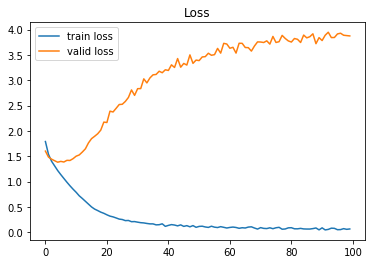

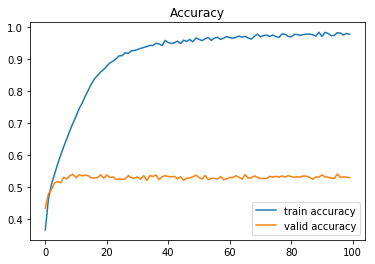

In [31]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()